In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [24]:
df = pd.read_csv('Weekly.csv')
df = df.dropna()

In [25]:
df

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up
...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,Up
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,Up
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,Up
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,Up


# logistic

a

In [38]:
from sklearn.impute import SimpleImputer

# Define the features (X) and target variable (y)
features = ['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']
target = 'Direction'

X = df[features]
y = df[target]

# Convert 'Direction' to numerical values (0 for 'Down', 1 for 'Up')
y = y.map({'Down': 0, 'Up': 1})

imputer = SimpleImputer(strategy='most_frequent')   #填补缺失值By most_frequent
y = imputer.fit_transform(y.values.reshape(-1, 1)).ravel() 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Convert predictions back to 'Direction' labels
y_pred_labels = ['Down' if pred == 0 else 'Up' for pred in y_pred]

b

In [39]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)

Accuracy: 0.56
Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.20      0.26        84
           1       0.61      0.79      0.69       134

    accuracy                           0.56       218
   macro avg       0.50      0.50      0.48       218
weighted avg       0.52      0.56      0.53       218



Confusion Matrix:
 [[ 95 305]
 [ 85 386]]


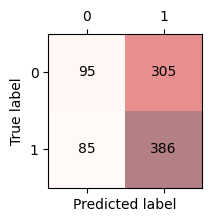

In [40]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix:\n", conf_matrix)

# Confusion matrix plot Raschka (2014)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(2, 2))
ax.matshow(conf_matrix, cmap=plt.cm.Reds, alpha=0.5)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

c

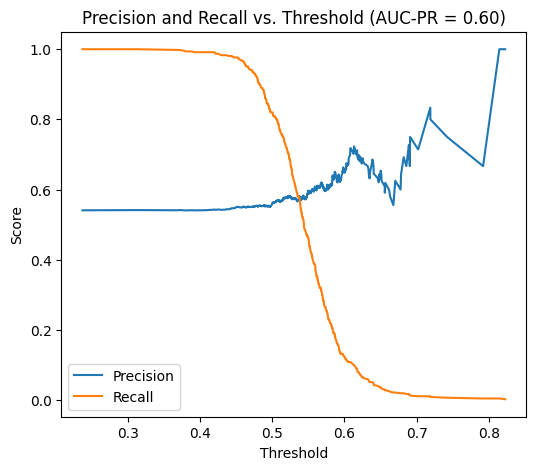

In [47]:
from sklearn.metrics import precision_recall_curve, auc

# Get predicted probabilities for the positive class
y_train_probs = model.predict_proba(X_train)[:, 1]

# Calculate the area under the precision-recall curve (AUC-PR)
precision, recall, thresholds = precision_recall_curve(y_train, y_train_probs)
auc_pr = auc(recall, precision)

# Plot precision and recall against the threshold
plt.figure(figsize=(6, 5))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.title(f'Precision and Recall vs. Threshold (AUC-PR = {auc_pr:.2f})')
plt.show()

d&e

In [49]:
# spilt the data
df['Year'] = pd.to_datetime(df['Year'], format='%Y')  #将df中名为'Year'的列转换为Python的日期时间格式（datetime类型）

df_new = df[df['Year'] <= '2008-12-31']
df_new

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990-01-01,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990-01-01,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990-01-01,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990-01-01,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990-01-01,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up
...,...,...,...,...,...,...,...,...,...
980,2008-01-01,12.026,-8.389,-6.198,-3.898,10.491,5.841565,-2.251,Down
981,2008-01-01,-2.251,12.026,-8.389,-6.198,-3.898,6.093950,0.418,Up
982,2008-01-01,0.418,-2.251,12.026,-8.389,-6.198,5.932454,0.926,Up
983,2008-01-01,0.926,0.418,-2.251,12.026,-8.389,5.855972,-1.698,Down


In [63]:
# replicate all the steps
features = ['Lag2', 'Volume']
target = 'Direction'

X = df_new[features]
y = df_new[target].map({'Down': 0, 'Up': 1})

imputer = SimpleImputer(strategy='most_frequent')
y = imputer.fit_transform(y.values.reshape(-1, 1)).ravel()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Convert predictions back to 'Direction' labels
y_pred_labels = ['Down' if pred == 0 else 'Up' for pred in y_pred]

In [65]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)

# Make predictions on the training data
y_train_pred = model.predict(X_train)

# Calculate the confusion matrix using predictions from the current model
conf_matrix = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.53
Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.11      0.18        90
           1       0.54      0.88      0.67       107

    accuracy                           0.53       197
   macro avg       0.49      0.49      0.42       197
weighted avg       0.49      0.53      0.44       197

Confusion Matrix:
 [[ 31 320]
 [ 27 410]]


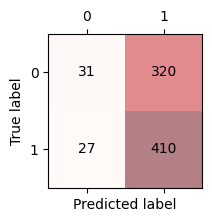

In [66]:
# Confusion matrix plot
fig, ax = plt.subplots(figsize=(2, 2))
ax.matshow(conf_matrix, cmap=plt.cm.Reds, alpha=0.5)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

f

### I may choose the first one since it has more accuracy, which implies this model is somewhat trustable.